In [1]:
#data
rawData = pd.read_csv('defaultofcreditcardclients.csv', header=1)
rawData.head()

NameError: name 'pd' is not defined

In [2]:
import pandas as pd

In [3]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMITBAL,SEX,EDUCATION,MARRIAGE,AGE,PAYZERO,PAYTWO,PAYTHREE,PAYFOUR,...,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMTONE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYAMTFIVE,PAYAMTSIX,DPNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID              30000 non-null int64
LIMITBAL        30000 non-null int64
SEX             30000 non-null int64
EDUCATION       30000 non-null int64
MARRIAGE        30000 non-null int64
AGE             30000 non-null int64
PAYZERO         30000 non-null int64
PAYTWO          30000 non-null int64
PAYTHREE        30000 non-null int64
PAYFOUR         30000 non-null int64
PAYFIVE         30000 non-null int64
PAYSIX          30000 non-null int64
BILLAMTONE      30000 non-null int64
BILLAMTTWO      30000 non-null int64
BILLAMTTHREE    30000 non-null int64
BILLAMTFOUR     30000 non-null int64
BILLAMTFIVE     30000 non-null int64
BILLAMTSIX      30000 non-null int64
PAYAMTONE       30000 non-null int64
PAYAMTTWO       30000 non-null int64
PAYAMTTHREE     30000 non-null int64
PAYAMTFOUR      30000 non-null int64
PAYAMTFIVE      30000 non-null int64
PAYAMTSIX       30000 non-null int64
DPN

In [7]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [8]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [9]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [13]:
variableName = rawData.iloc[:,0:4]

In [14]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILLAMTONE,BILLAMTTWO,BILLAMTTHREE,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMTONE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYAMTFIVE
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [15]:
#dependent variable
depVar = rawData['PAYAMTSIX']

In [16]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILLAMTONE,BILLAMTTWO,BILLAMTTHREE,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMTONE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYAMTFIVE
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [17]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAYAMTSIX, dtype: int64

In [18]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILLAMTONE  BILLAMTTWO  BILLAMTTHREE  BILLAMTFOUR  BILLAMTFIVE  \
29900       16809           0             0            0            0   
29901       50845       48750        103486        50590        50248   
29902       10392      168088        168955       161351       126198   
29903       27378       17082         13333           99           99   
29904       54952       56021         54126        58732        59306   

       BILLAMTSIX  PAYAMTONE  PAYAMTTWO  PAYAMTTHREE  PAYAMTFOUR  PAYAMTFIVE  
29900           0          0          0            0           0           0  
29901       49387          0       6556         3250        1563        1208  
29902      124746     168096       6409         7335        4448        4519  
29903      172104      10018      13333           99          99      172104  
29904       59728       2600       4553         5800        2000        1000  


In [19]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAYAMTSIX, dtype: int64

In [22]:
import numpy as np

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [27]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression(n_jobs=10)

In [31]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [32]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILLAMTONE,BILLAMTTWO,BILLAMTTHREE,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMTONE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYAMTFIVE
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [33]:
#dependent variable
print(depVar)

0           0
1        2000
2        5000
3        1000
4         679
         ... 
29995    1000
29996       0
29997    3100
29998    1804
29999    1000
Name: PAYAMTSIX, Length: 30000, dtype: int64


In [34]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [35]:
modelRF.fit(X_train,y_train)

/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
modelSVR.fit(X_train,y_train)

/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
print(cross_val_score(modelRF, X_train, y_train)) 

[0.00439709 0.18635317 0.01212057]


/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
model.score(X_train,y_train)

0.33586523612925867

In [41]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.10715907 -0.27604465 -0.00754311]


/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8297662431387688

In [42]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.06621701 -0.09432496 -0.04185033]


/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/sv

-0.055284625889759464

In [43]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-0.37872983  0.03995652 -0.01400786]


/Users/erichoneycutt/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.33586523612925867

In [44]:
predictions = modelRF.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [46]:
from math import sqrt

In [47]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [48]:
predRsquared = r2_score(y_test,predictions)

In [50]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.064
RMSE: 45838.453


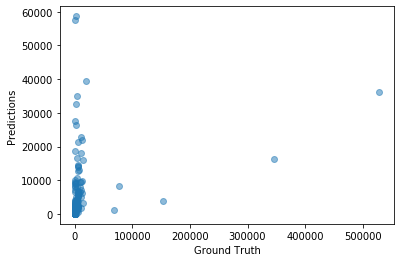

In [52]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [53]:
#data
Credit = pd.read_csv('defaultofcreditcardclients.csv', header=1)
Credit.head()

,ID,LIMITBAL,SEX,EDUCATION,MARRIAGE,AGE,PAYZERO,PAYTWO,PAYTHREE,PAYFOUR,...,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMT0NE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYFIVE.1,PAYAMTSIX,DPNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [55]:
Credit.dropna()

,ID,LIMITBAL,SEX,EDUCATION,MARRIAGE,AGE,PAYZERO,PAYTWO,PAYTHREE,PAYFOUR,...,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMT0NE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYFIVE.1,PAYAMTSIX,DPNM
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [58]:
Credit.drop(['ID'], axis=1)

,LIMITBAL,SEX,EDUCATION,MARRIAGE,AGE,PAYZERO,PAYTWO,PAYTHREE,PAYFOUR,PAYFIVE,...,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMT0NE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYFIVE.1,PAYAMTSIX,DPNM
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [60]:
#features
features = rawData.iloc[:,1:24]
print('Summary of feature sample')
features.head()

Summary of feature sample


,LIMITBAL,SEX,EDUCATION,MARRIAGE,AGE,PAYZERO,PAYTWO,PAYTHREE,PAYFOUR,PAYFIVE,...,BILLAMTTHREE,BILLAMTFOUR,BILLAMTFIVE,BILLAMTSIX,PAYAMTONE,PAYAMTTWO,PAYAMTTHREE,PAYAMTFOUR,PAYAMTFIVE,PAYAMTSIX
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [61]:
#dependent variable
depVar = Credit['DPNM']

In [62]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: DPNM, dtype: int64

In [63]:
#Testing Set (X Testing)
X_test = features[-9000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       LIMITBAL  SEX  EDUCATION  MARRIAGE  AGE  PAYZERO  PAYTWO  PAYTHREE  \
21000     30000    1          2         1   36        1      -1        -1   
21001    280000    1          3         1   40        2       0         0   
21002    260000    1          2         1   37        0       0         0   
21003    200000    1          2         2   32        2       0         0   
21004     80000    1          2         2   32        2       0         0   

       PAYFOUR  PAYFIVE  ...  BILLAMTTHREE  BILLAMTFOUR  BILLAMTFIVE  \
21000       -1        0  ...             0         1170          780   
21001        0        0  ...        188411       191291       189029   
21002        0        0  ...         21557        23186        14117   
21003        0       -2  ...         81890            0            0   
21004        0        0  ...         67253        67352        74448   

       BILLAMTSIX  PAYAMTONE  PAYAMTTWO  